In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score

In [2]:
#words = set(nltk.corpus.words.words())

In [3]:
sa = pd.read_csv(r"C:\Users\bujib\Desktop\Python\NLP\train.csv")

In [4]:
sa.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [5]:
sa.tail

<bound method NDFrame.tail of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [6]:
sa.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [7]:
#sa['tweet'] = sa['tweet'].astype('str') 

In [8]:
#sa.dtypes

In [9]:
#re.sub('@user', '', sa['tweet'], count=0, flags=0)

In [10]:
sa.replace('@user','',regex=True, inplace = True)

In [11]:
sa.replace('#','',regex=True, inplace = True)

In [12]:
sa.replace('@',' ',regex=True, inplace = True)

In [13]:
sa.replace(' -',' ',regex=True, inplace = True)

In [14]:
sa.replace('â\x80¦','',regex=True, inplace = True)

In [15]:
sa.replace('&amp;',' ',regex=True, inplace = True)

In [16]:
sa.replace('[0-9]',' ',regex=True, inplace = True)

In [17]:
sa.replace('[!@#$%^&*,.;:()?]',' ',regex=True, inplace = True)

In [18]:
#sa.replace('[ð±]',' ',regex=True, inplace = True)

In [19]:
sa.replace(' a ',' ',regex=True, inplace = True)

In [20]:
sa.replace(' the ',' ',regex=True, inplace = True)

In [21]:
sa.replace(' is ',' ',regex=True, inplace = True)

In [22]:
sa.replace(' of ',' ',regex=True, inplace = True)

In [23]:
sa.replace(' to ',' ',regex=True, inplace = True)

In [24]:
sa.replace(' i ',' ',regex=True, inplace = True)

In [25]:
sa.replace(' in ',' ',regex=True, inplace = True)

In [26]:
sa.replace('i ',' ',regex=True, inplace = True)

In [27]:
sa.replace(" i'm ",' ',regex=True, inplace = True)

In [28]:
sa.replace(" it's ",' ',regex=True, inplace = True)

In [29]:
sa.replace(" it ",' ',regex=True, inplace = True)

In [30]:
sa.replace(" don't ",' ',regex=True, inplace = True)

In [31]:
sa.replace(" am ",' ',regex=True, inplace = True)

In [32]:
sa.replace(" u ",' ',regex=True, inplace = True)

In [33]:
sa.replace(" can't ",' ',regex=True, inplace = True)

In [34]:
sa.replace(" by ",' ',regex=True, inplace = True)

In [35]:
sa.replace(" as ",' ',regex=True, inplace = True)

In [36]:
sa.replace(" be ",' ',regex=True, inplace = True)

In [37]:
sa.replace('[^a-zA-Z]',' ',regex=True, inplace = True)

In [38]:
sa.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0    when father dysfunctional and so selfish he ...
1          2      0    thanks for lyft credit use cause they offer ...
2          3      0                                bihday your majesty
3          4      0  model   love take with all time ur            ...
4          5      0              factsguide  society now    motivation
...      ...    ...                                                ...
31957  31958      0  ate  isz that youuu                           ...
31958  31959      0    see nina turner on airwaves trying wrap hers...
31959  31960      0  listening sad songs on monday morning otw work...
31960  31961      1   sikh temple vandalised in calgary  wso condem...
31961  31962      0                        thank you  for you follow  

[31962 rows x 3 columns]>

In [39]:
from collections import Counter

In [40]:
#df = Counter(" ".join(sa["tweet"].str.lower()).split()).most_common(100)

In [41]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [42]:
#df

In [43]:
clean_tweet = []
for tweet in sa["tweet"]:
    clean_tweet.append(tweet)

In [44]:
clean_tweets = ' '.join(map(str, clean_tweet))

In [45]:
counts = dict()
words = clean_tweets.split()
for word in words:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1    

In [46]:
for x in counts.copy():
    if len(x) <= 1:
        counts.pop(x)

In [47]:
Counter(counts).most_common(100)

[('you', 5949),
 ('and', 4945),
 ('for', 4510),
 ('my', 3710),
 ('love', 2762),
 ('this', 2686),
 ('on', 2672),
 ('with', 2529),
 ('day', 2372),
 ('that', 2064),
 ('all', 2038),
 ('so', 1998),
 ('are', 1894),
 ('me', 1846),
 ('happy', 1705),
 ('your', 1702),
 ('at', 1655),
 ('have', 1642),
 ('we', 1580),
 ('just', 1367),
 ('will', 1276),
 ('when', 1269),
 ('not', 1225),
 ('do', 1209),
 ('what', 1175),
 ('life', 1161),
 ('like', 1160),
 ('time', 1146),
 ('but', 1111),
 ('today', 1089),
 ('from', 1058),
 ('up', 1035),
 ('now', 1007),
 ('new', 998),
 ('thankful', 951),
 ('out', 950),
 ('positive', 935),
 ('get', 923),
 ('was', 911),
 ('can', 894),
 ('people', 887),
 ('about', 871),
 ('how', 870),
 ('our', 867),
 ('bihday', 866),
 ('good', 861),
 ('no', 839),
 ('they', 834),
 ('one', 797),
 ('see', 762),
 ('more', 725),
 ('smile', 724),
 ('if', 697),
 ('go', 665),
 ('who', 662),
 ('father', 652),
 ('want', 652),
 ('he', 643),
 ('take', 625),
 ('work', 614),
 ('healthy', 606),
 ('re', 602),

In [48]:
wc = WordCloud().generate_from_text(clean_tweets)

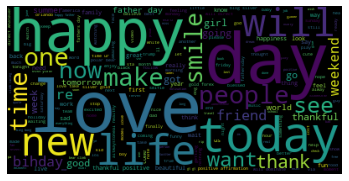

In [49]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [50]:
f = open("positive-words.txt", "r")
g = open("negative-words.txt", "r")

In [51]:
tempa = []
tempb = []
res1 = []
res2 = []
label2 = []

In [52]:
for x in f:
    temp1 = x.split()
    tempa.append(temp1)
    
for x in g:
    temp2 = x.split()
    tempb.append(temp2)

In [53]:
def flatlist(l):
    for x in l:
        if type(x) == list:
            flatlist(x)
        else:
            res1.append(x)

In [54]:
flatlist(tempa)

In [55]:
def flatlist(l):
    for x in l:
        if type(x) == list:
            flatlist(x)
        else:
            res2.append(x)

In [56]:
flatlist(tempb)

In [57]:
keywords = ["not"]

In [58]:
for tweet in sa["tweet"]:
    temp2 = tweet.split()
    i=0
    if any(x in temp2 for x in res1):#positive
        i+=1
    if any(x in temp2 for x in res2):#negative
        i-=1
    for key in keywords:
        if key in temp2:
            if temp2.index(key)+1 == len(temp2):
                break
            elif temp2[temp2.index(key)+1] in res1:
                i-=2
    for key in keywords:
        if key in temp2:
            if temp2.index(key)+1 == len(temp2):
                break
            elif temp2[temp2.index(key)+1] in res2:
                i+=2
    if i>=0:
        label2.append(0)
    elif i<0:
        label2.append(1)

In [59]:
f.close()
g.close()

In [60]:
#print(temp2)

In [61]:
sa["label"]

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [62]:
label = []

In [63]:
label = sa["label"]
i=0
j=0

In [64]:
while i<31962:
    if label2[i] == label[i]:
        j+=1
    i+=1

In [65]:
j/31962

0.8230085726800576

In [66]:
confusion_matrix(label, label2)

array([[25524,  4196],
       [ 1461,   781]], dtype=int64)

In [67]:
f1_score(label, label2, average='macro')

0.5583057665858616